<a href="https://colab.research.google.com/github/KombatBakpen/Machine-Learning-II/blob/main/Denoising_With_Autoencoder_on_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DENOISING OF NMIST DATASET USING AUTOENCODER | BAKPEN KOMBAT

This project demonstrates a denoising autoencoder using the MNIST dataset. Artificial Gaussian noise is added to the images, and the autoencoder is trained to remove this noise using convolutional layers for encoding and decoding. The model is trained with a cross-entropy loss and was successfully used to reconstruct noisy MNIST images without noise.

**Model Evaluation**
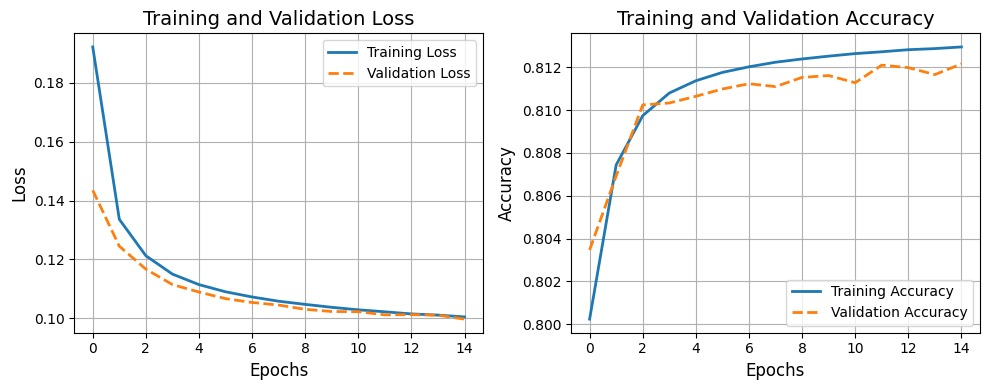


**Prediction**


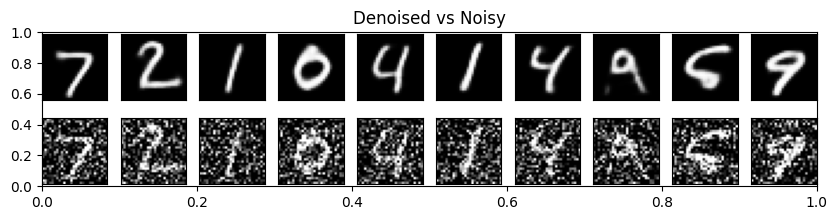


**Imports**

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

**Load Data**


In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Preprocessing**: Normalize and reshape the data

In [ ]:
# normalization
x_train = x_train.astype("float32")/255.
x_test = x_test.astype("float32")/255.

# to be feed in the model
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale=1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale=1.0, size = x_test.shape)

#clip values to [0,1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

**Add Noise**

**Plot an image**

Text(0.5, 1.0, 'Orginal image')

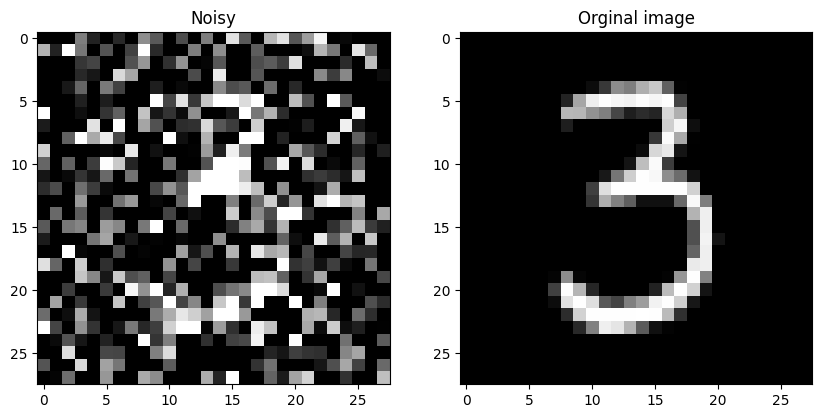

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(x_train_noisy[50].reshape(28,28), cmap="gray")
plt.title("Noisy")

plt.subplot(1,2,2)
plt.imshow(x_train[50].reshape(28,28), cmap="gray")
plt.title("Orginal image")

**Model Architecture**

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input

def encoder():
    """Encoder block"""
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2), padding="same"))
    model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
    model.add(MaxPooling2D((2, 2), padding="same"))
    model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
    model.add(MaxPooling2D((2, 2), padding="same"))
    return model

def decoder():
    """Decoder block"""
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(4, 4, 32)))  # Match encoder output
    model.add(UpSampling2D((2, 2)))  # 4x4 to 8x8
    model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
    model.add(UpSampling2D((2, 2)))  # 8x8 to 16x16
    model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
    model.add(UpSampling2D((2, 2)))  # 16x16 to 32x32
    # Crop the output to 28x28 to match the target shape
    model.add(layers.Cropping2D(((2, 2), (2, 2)))) # Crop 2 pixels from top, bottom, left, and right
    model.add(Conv2D(1, (3, 3), activation="sigmoid", padding="same"))  # 28x28 to 28x28 output
    return model

def autoencoder():
    """Autoencoder"""
    input_img = Input(shape=(28, 28, 1))
    encoder_model = encoder()
    encoded = encoder_model(input_img)
    decoder_model = decoder()
    decoded = decoder_model(encoded)
    autoencoder_model = models.Model(inputs=input_img, outputs=decoded)

    return autoencoder_model


model = autoencoder()

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Display the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 4, 4, 32)            │          18,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 28, 28, 1)           │          28,033 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

**Train the model**

In [ ]:
history = model.fit(x_train_noisy, x_train,
          epochs=15,
          batch_size=128,
          shuffle=True,
          validation_data=(x_test_noisy, x_test))
evaluation = model.evaluate(x_test_noisy, x_test)
model.save("autoencoder.h5")



Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.7978 - loss: 0.2630 - val_accuracy: 0.8038 - val_loss: 0.1392
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8073 - loss: 0.1352 - val_accuracy: 0.8095 - val_loss: 0.1237
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8095 - loss: 0.1224 - val_accuracy: 0.8095 - val_loss: 0.1160
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8109 - loss: 0.1157 - val_accuracy: 0.8099 - val_loss: 0.1119
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8113 - loss: 0.1117 - val_accuracy: 0.8107 - val_loss: 0.1086
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8115 - loss: 0.1091 - val_accuracy: 0.8109 - val_loss: 0.1064
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8118 - loss: 0.1071 - val_accuracy: 0.8117 - val_loss: 0.1051
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8121 - loss: 0.1055 - val_accuracy:

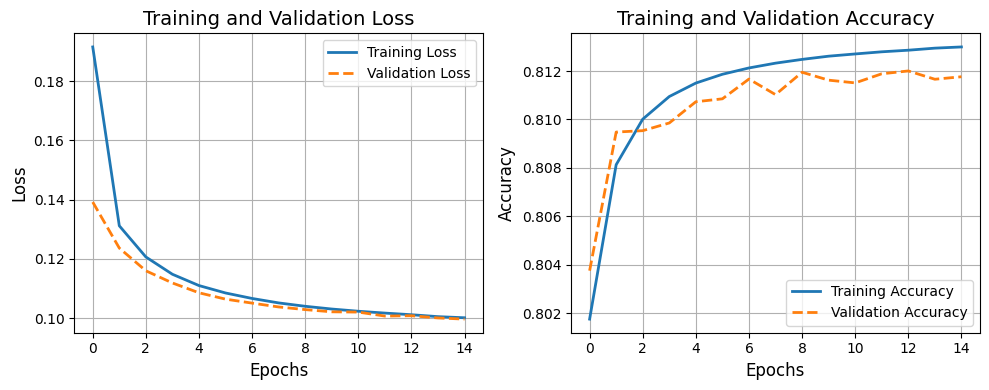

In [ ]:
plt.figure(figsize=(10, 4))  # Larger figure size for better visibility

# Subplot 1: Loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss", linewidth=2)
plt.plot(history.history["val_loss"], label="Validation Loss", linestyle="--", linewidth=2)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Subplot 2: Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy", linewidth=2)
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", linestyle="--", linewidth=2)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


#Predict

In [ ]:
cleanImg = model.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


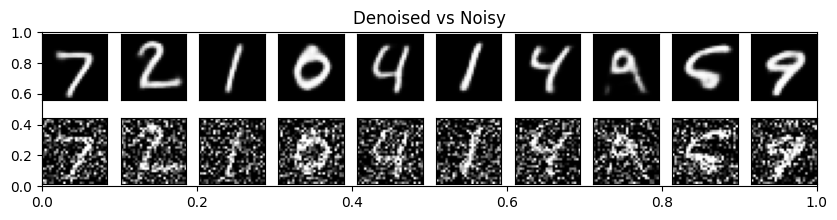

In [ ]:
cleanImg = model.predict(x_test_noisy)
plt.figure(figsize=(10,2))
plt.title("Denoised vs Noisy")
for i in range(10):
  ax = plt.subplot(2,10,i+1)
  plt.imshow(cleanImg[i].reshape(28,28), cmap="gray")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


for i in range(10):
  ax = plt.subplot(2,10,i+11)
  plt.imshow(x_test_noisy[i].reshape(28,28), cmap="gray")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)





